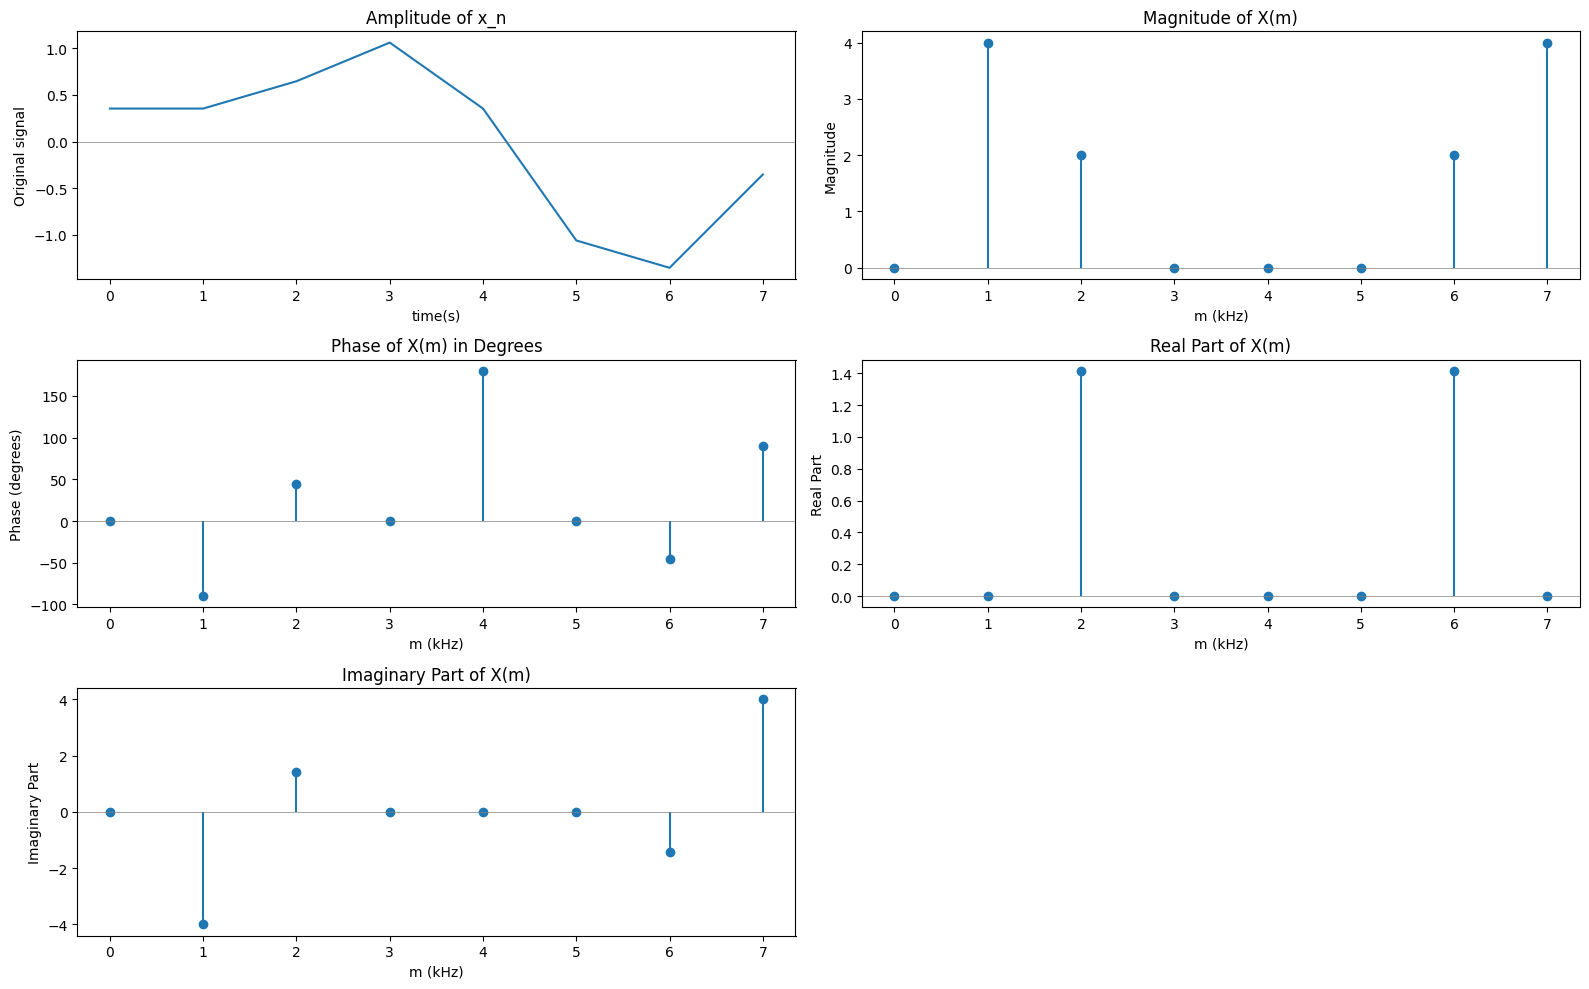

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath as cm

Fs = 8000             
T = 1 / Fs           
N = 8                
n = np.arange(N)   

f1 = 1000            
f2 = 2000       

# Discreate Signal
x_n = np.sin(2 * np.pi * f1 * n * T) + 0.5 * np.sin(2 * np.pi * f2 * n * T + 3 * np.pi / 4)
X_m = np.zeros(N, dtype=complex)
     
def DFT():     
    for m in range(N):
        for k in range(N):
            X_m[m] += x_n[k] * np.exp(-1j * 2 * np.pi * k * m / N)

DFT()

# Function to calculate phase angles in degrees
def get_phases(x):
    phases = []
    for i in x:
        temp = cm.phase(round(i.real, 2) + round(i.imag, 2) * 1j)
        phases.append(math.degrees(temp))
    return phases

# Calculating DFT characteristics
magnitude = np.abs(X_m)
phase = get_phases(X_m)
real_part = np.real(X_m)
imaginary_part = np.imag(X_m)

# Plotting each characteristic using plt.subplot
plt.figure(figsize=(16, 10))

#original signal
plt.subplot(3, 2, 1)
plt.plot(n, x_n)
plt.axhline(0, color='gray', linewidth=0.5)  
plt.title("Amplitude of x_n")
plt.xlabel("time(s)")
plt.ylabel("Original signal")

# Magnitude plot
plt.subplot(3, 2, 2)
plt.stem(n, magnitude, basefmt=" ")
plt.axhline(0, color='gray', linewidth=0.5)  
plt.title("Magnitude of X(m)")
plt.xlabel("m (kHz)")
plt.ylabel("Magnitude")

# Phase plot
plt.subplot(3, 2, 3)
plt.stem(n, phase, basefmt=" ")
plt.axhline(0, color='gray', linewidth=0.5)
plt.title("Phase of X(m) in Degrees")
plt.xlabel("m (kHz)")
plt.ylabel("Phase (degrees)")
plt.xticks(n)

# Real part plot
plt.subplot(3, 2, 4)
plt.stem(n, real_part, basefmt=" ")
plt.axhline(0, color='gray', linewidth=0.5)
plt.title("Real Part of X(m)")
plt.xlabel("m (kHz)")
plt.ylabel("Real Part")
plt.xticks(n)

# Imaginary part plot
plt.subplot(3, 2, 5)
plt.stem(n, imaginary_part, basefmt=" ")
plt.axhline(0, color='gray',linewidth=0.5)
plt.title("Imaginary Part of X(m)")
plt.xlabel("m (kHz)")
plt.ylabel("Imaginary Part")
plt.xticks(n)

#plotting reconstructed signal

# Adjust layout
plt.tight_layout()
plt.show()
